<a href="https://colab.research.google.com/github/juliaradula/rhizomucor_miehei_transcriptome/blob/main/transcriptome_dataframe_modifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importar bibliotecas que serao utiizadas
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#carregar dados de anotacao funcional (Trinotate)
#os arquivos estao no google drive
#o endereco do arquivo pode ser copiado clicando nos tres pontinhos
#a direita do nome do arquivo e selecionar 'copy path'
#aqui o arquivo selecionado eh 'Trinotate.RMA.xls'
#para usar outro arquivo substitua '/content/drive/MyDrive/RMA/Trinotate.RMA.xls'
#pelo endereco desejado

trinotate = pd.read_csv("/content/drive/MyDrive/RMA/Trinotate.RMA.xls", sep="\t")

#o codigo seguinte '.head()' retorna as primeiras 5 linhas do arquivo
trinotate.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide
0,TRINITY_DN5078_c0_g1,TRINITY_DN5078_c0_g1_i1,.,.,TRINITY_DN5078_c0_g1_i1.p1,2-628[+],.,.,.,.,.,.,.,.,.,.
1,TRINITY_DN5078_c0_g1,TRINITY_DN5078_c0_g1_i2,.,.,TRINITY_DN5078_c0_g1_i2.p1,2-673[+],.,.,.,.,.,.,.,.,.,.
2,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.
3,TRINITY_DN5074_c0_g1,TRINITY_DN5074_c0_g1_i1,.,.,TRINITY_DN5074_c0_g1_i1.p1,6-335[-],.,.,.,.,.,.,.,.,.,.
4,TRINITY_DN5003_c0_g1,TRINITY_DN5003_c0_g1_i1,.,.,TRINITY_DN5003_c0_g1_i1.p1,71-604[+],.,.,.,.,.,.,.,.,.,.


In [ ]:
#para conferir o tamanho da tabela
#nesse caso tem 69080 linhas e 16 colunas
trinotate.shape

(69080, 16)

In [ ]:
#carregar dados de abundancia
#assim como anteriormente, substitua o endereco entre aspas pelo
#endereco do arquivo desejado
abundancia = pd.read_csv("/content/drive/MyDrive/RMA/RMA.abundance.tsv", sep="\t")
abundancia.head()

,target_id,length,eff_length,est_counts,tpm
0,TRINITY_DN5078_c0_g1_i1,629,479.808,11.47500,1.275230
1,TRINITY_DN5078_c0_g1_i2,675,525.785,15.52500,1.574440
2,TRINITY_DN5046_c0_g1_i1,595,445.808,20.00000,2.392140
3,TRINITY_DN5074_c0_g1_i1,583,433.808,18.00000,2.212480
4,TRINITY_DN5003_c0_g1_i1,685,535.785,4.16427,0.414431


In [ ]:
id = abundancia["target_id"].str.split("_", expand=True)
id.columns = ["0", "DN", "C", "G", "I"]
id.drop("0", axis=1, inplace=True)
id

,DN,C,G,I
0,DN5078,c0,g1,i1
1,DN5078,c0,g1,i2
2,DN5046,c0,g1,i1
3,DN5074,c0,g1,i1
4,DN5003,c0,g1,i1
...,...,...,...,...
69075,DN21000,c0,g1,i5
69076,DN21000,c0,g1,i6
69077,DN21000,c0,g1,i7
69078,DN21000,c0,g1,i8


In [ ]:
len(id["DN"].unique())

20347

In [ ]:
id["tpm"] = abundancia["tpm"]
id

,DN,C,G,I,tpm
0,DN5078,c0,g1,i1,1.275230
1,DN5078,c0,g1,i2,1.574440
2,DN5046,c0,g1,i1,2.392140
3,DN5074,c0,g1,i1,2.212480
4,DN5003,c0,g1,i1,0.414431
...,...,...,...,...,...
69075,DN21000,c0,g1,i5,2.804770
69076,DN21000,c0,g1,i6,1.522460
69077,DN21000,c0,g1,i7,3.152850
69078,DN21000,c0,g1,i8,1.155650


In [ ]:
id["tpm"].sum()

999999.9833278443

In [ ]:
id["C"].unique()

In [ ]:
id["G"].unique()

array(['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10'],
      dtype=object)

In [ ]:
id["I"].unique()

array(['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11',
       'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 'i18', 'i19', 'i20',
       'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29',
       'i30', 'i31', 'i32', 'i33', 'i34', 'i35', 'i36', 'i37', 'i38',
       'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47',
       'i48', 'i49', 'i50'], dtype=object)

In [ ]:
id = id.replace("^c", "", regex=True)
id = id.replace("^g", "", regex=True)
id = id.replace("^i", "", regex=True)
#id = id.replace("^DN", "", regex=True)
id = id.astype("float64", errors="ignore")
id = id.convert_dtypes()
id

,DN,C,G,I,tpm
0,DN5078,0,1,1,1.275230
1,DN5078,0,1,2,1.574440
2,DN5046,0,1,1,2.392140
3,DN5074,0,1,1,2.212480
4,DN5003,0,1,1,0.414431
...,...,...,...,...,...
69075,DN21000,0,1,5,2.804770
69076,DN21000,0,1,6,1.522460
69077,DN21000,0,1,7,3.152850
69078,DN21000,0,1,8,1.155650


In [ ]:
id.drop("C", axis=1, inplace=True)
id.drop("G", axis=1, inplace=True)
id.drop("I", axis=1, inplace=True)
id

In [ ]:
id_dict = id.to_dict("index")
id_dict

In [ ]:
soma_tpm_dict = {}
for i, v in id_dict.items():
  soma_tpm_dict[v["DN"]] = v["tpm"] + soma_tpm_dict.get(v["DN"], 0)

In [ ]:
soma_tpm_dict

In [ ]:
soma_tpm = pd.DataFrame(data=soma_tpm_dict.items(), columns=[1, "soma_tpm"])
soma_tpm

,1,soma_tpm
0,DN5078,2.849670
1,DN5046,2.392140
2,DN5074,2.212480
3,DN5003,2.680831
4,DN5043,9.961120
...,...,...
20342,DN21055,53.926235
20343,DN21020,56.568980
20344,DN21041,13.981581
20345,DN21000,11.738984


In [ ]:
soma_tpm.describe()

,tpm
count,20347.000000
mean,49.147294
std,291.630128
min,0.560008
25%,5.387653
50%,13.064660
75%,30.306055
max,22118.767680


In [ ]:
soma_tpm["tpm"].sum()

999999.9833278442

In [ ]:
id.describe()

,tpm
count,69080.000000
mean,14.475970
std,103.016872
min,0.000000
25%,1.234065
50%,3.046705
75%,7.856638
max,14664.300000


In [ ]:
#conferindo o tamanho da tabela
#importante ter o mesmo numero de linhas que a tabela 'trinotate'
abundancia.shape

(69080, 5)

In [ ]:
#trocar o nome das colunas da tabela 'abundancia'
#isso facilitara a mesclagem das tabelas
abundancia.columns = ["transcript_id", "length", "eff_length", "est_counts", "tpm"]
abundancia.head()

,transcript_id,length,eff_length,est_counts,tpm
0,TRINITY_DN5078_c0_g1_i1,629,479.808,11.47500,1.275230
1,TRINITY_DN5078_c0_g1_i2,675,525.785,15.52500,1.574440
2,TRINITY_DN5046_c0_g1_i1,595,445.808,20.00000,2.392140
3,TRINITY_DN5074_c0_g1_i1,583,433.808,18.00000,2.212480
4,TRINITY_DN5003_c0_g1_i1,685,535.785,4.16427,0.414431


In [ ]:
#juntar as tabelas 'trinotate' e 'abundancia' pela coluna 'trascript_id'
trinotate_edit = pd.merge(trinotate, abundancia, on="transcript_id")

#agora a tabela nova 'trinotate_edit' tem os dados das duas tabelas anteriores
trinotate_edit.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm
0,TRINITY_DN5078_c0_g1,TRINITY_DN5078_c0_g1_i1,.,.,TRINITY_DN5078_c0_g1_i1.p1,2-628[+],.,.,.,.,.,.,.,.,.,.,629,479.808,11.47500,1.275230
1,TRINITY_DN5078_c0_g1,TRINITY_DN5078_c0_g1_i2,.,.,TRINITY_DN5078_c0_g1_i2.p1,2-673[+],.,.,.,.,.,.,.,.,.,.,675,525.785,15.52500,1.574440
2,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.00000,2.392140
3,TRINITY_DN5074_c0_g1,TRINITY_DN5074_c0_g1_i1,.,.,TRINITY_DN5074_c0_g1_i1.p1,6-335[-],.,.,.,.,.,.,.,.,.,.,583,433.808,18.00000,2.212480
4,TRINITY_DN5003_c0_g1,TRINITY_DN5003_c0_g1_i1,.,.,TRINITY_DN5003_c0_g1_i1.p1,71-604[+],.,.,.,.,.,.,.,.,.,.,685,535.785,4.16427,0.414431


In [ ]:
teste = pd.DataFrame(r.split("^") for r in trinotate_edit["sprot_Top_BLASTX_hit"])

In [ ]:
teste = teste[0]
teste = pd.DataFrame(teste)
teste

,0
0,.
1,.
2,PAPOB_HUMAN
3,.
4,.
...,...
69075,GEFP_DICDI
69076,GEFP_DICDI
69077,GEFP_DICDI
69078,GEFP_DICDI


In [ ]:
teste["transcript_id"] = trinotate_edit["transcript_id"]
teste

,0,transcript_id
0,.,TRINITY_DN5078_c0_g1_i1
1,.,TRINITY_DN5078_c0_g1_i2
2,PAPOB_HUMAN,TRINITY_DN5046_c0_g1_i1
3,.,TRINITY_DN5074_c0_g1_i1
4,.,TRINITY_DN5003_c0_g1_i1
...,...,...
69075,GEFP_DICDI,TRINITY_DN21000_c0_g1_i5
69076,GEFP_DICDI,TRINITY_DN21000_c0_g1_i6
69077,GEFP_DICDI,TRINITY_DN21000_c0_g1_i7
69078,GEFP_DICDI,TRINITY_DN21000_c0_g1_i8


In [ ]:
trinotate_edit2 = pd.merge(trinotate_edit, teste, on="transcript_id")
trinotate_edit2

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0
0,TRINITY_DN5078_c0_g1,TRINITY_DN5078_c0_g1_i1,.,.,TRINITY_DN5078_c0_g1_i1.p1,2-628[+],.,.,.,.,.,.,.,.,.,.,629,479.808,11.47500,1.275230,.
1,TRINITY_DN5078_c0_g1,TRINITY_DN5078_c0_g1_i2,.,.,TRINITY_DN5078_c0_g1_i2.p1,2-673[+],.,.,.,.,.,.,.,.,.,.,675,525.785,15.52500,1.574440,.
2,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.00000,2.392140,PAPOB_HUMAN
3,TRINITY_DN5074_c0_g1,TRINITY_DN5074_c0_g1_i1,.,.,TRINITY_DN5074_c0_g1_i1.p1,6-335[-],.,.,.,.,.,.,.,.,.,.,583,433.808,18.00000,2.212480,.
4,TRINITY_DN5003_c0_g1,TRINITY_DN5003_c0_g1_i1,.,.,TRINITY_DN5003_c0_g1_i1.p1,71-604[+],.,.,.,.,.,.,.,.,.,.,685,535.785,4.16427,0.414431,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69075,TRINITY_DN21000_c0_g1,TRINITY_DN21000_c0_g1_i5,"GEFP_DICDI^GEFP_DICDI^Q:2232-2936,H:1265-1498^...",.,TRINITY_DN21000_c0_g1_i5.p1,918-2990[+],"GEFP_DICDI^GEFP_DICDI^Q:443-673,H:1269-1498^37...",.,.,.,ENOG410XR96^Son of sevenless homolog,KEGG:ddi:DDB_G0281573,GO:0005085^molecular_function^guanyl-nucleotid...,.,.,.,3116,2966.790,156.05500,2.804770,GEFP_DICDI
69076,TRINITY_DN21000_c0_g1,TRINITY_DN21000_c0_g1_i6,"GEFP_DICDI^GEFP_DICDI^Q:2232-3050,H:1265-1498^...",.,TRINITY_DN21000_c0_g1_i6.p1,918-2717[+],"GEFA_DICDI^GEFA_DICDI^Q:436-592,H:348-509^35.5...",.,.,.,ENOG410XR96^Son of sevenless homolog,KEGG:ddi:DDB_G0284329,GO:0005829^cellular_component^cytosol`GO:00058...,.,.,.,3230,3080.790,87.96350,1.522460,GEFP_DICDI
69077,TRINITY_DN21000_c0_g1,TRINITY_DN21000_c0_g1_i7,"GEFP_DICDI^GEFP_DICDI^Q:2141-2845,H:1265-1498^...",.,TRINITY_DN21000_c0_g1_i7.p1,134-2899[+],"GEFP_DICDI^GEFP_DICDI^Q:674-904,H:1269-1498^37...",.,.,.,ENOG410XR96^Son of sevenless homolog,KEGG:ddi:DDB_G0281573,GO:0005085^molecular_function^guanyl-nucleotid...,.,.,.,3025,2875.790,170.04200,3.152850,GEFP_DICDI
69078,TRINITY_DN21000_c0_g1,TRINITY_DN21000_c0_g1_i8,"GEFP_DICDI^GEFP_DICDI^Q:2287-2991,H:1265-1498^...",.,TRINITY_DN21000_c0_g1_i8.p1,1408-3045[+],"GEFP_DICDI^GEFP_DICDI^Q:298-528,H:1269-1498^37...",.,.,.,ENOG410XR96^Son of sevenless homolog,KEGG:ddi:DDB_G0281573,GO:0005085^molecular_function^guanyl-nucleotid...,.,.,.,3171,3021.790,65.49180,1.155650,GEFP_DICDI


In [ ]:
uniprot = pd.read_csv("/content/drive/MyDrive/RMA_uniprot.tab", sep="\t")
uniprot.head()

,Entry,yourlist:M202106304ABAA9BC7178C81CEBC9459510EDDEA30A9DC5B,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons)
0,P93212,14337_SOLLC,14337_SOLLC,Solanum lycopersicum (Tomato) (Lycopersicon es...,NaN,NaN,NaN,NaN,NaN,NaN
1,P92177,1433E_DROME,1433E_DROME,Drosophila melanogaster (Fruit fly),NaN,centrosome [GO:0005813]; chromosome [GO:000569...,GO:0000077; GO:0005634; GO:0005654; GO:0005694...,NaN,R-DME-3371453;R-DME-3371511;R-DME-390098;R-DME...,NaN
2,Q99002,1433_TRIHA,1433_TRIHA,Trichoderma harzianum (Hypocrea lixii),NaN,NaN,NaN,NaN,NaN,NaN
3,Q8GYY0,1A112_ARATH,1A112_ARATH,Arabidopsis thaliana (Mouse-ear cress),2.6.1.-,pyridoxal phosphate binding [GO:0030170]; tran...,GO:0008483; GO:0030170; GO:0042218,NaN,NaN,NaN
4,Q6PD03,2A5A_MOUSE,2A5A_MOUSE,Mus musculus (Mouse),NaN,"centrosome [GO:0005813]; chromosome, centromer...",GO:0000159; GO:0000775; GO:0004721; GO:0005634...,NaN,R-MMU-141444;R-MMU-195253;R-MMU-196299;R-MMU-2...,NaN


In [ ]:
uniprot.columns

Index(['Entry', 'yourlist:M202106304ABAA9BC7178C81CEBC9459510EDDEA30A9DC5B',
       'Entry name', 'Organism', 'EC number', 'Gene ontology (GO)',
       'Gene ontology IDs', 'Cross-reference (UniPathway)',
       'Cross-reference (Reactome)', 'Cross-reference (PathwayCommons)'],
      dtype='object')

In [ ]:
uniprot.columns = ['Entry', 0,
       'Entry name', 'Organism', 'EC number', 'Gene ontology (GO)',
       'Gene ontology IDs', 'Cross-reference (UniPathway)',
       'Cross-reference (Reactome)', 'Cross-reference (PathwayCommons)']
uniprot.head()

,Entry,0,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons)
0,P93212,14337_SOLLC,14337_SOLLC,Solanum lycopersicum (Tomato) (Lycopersicon es...,NaN,NaN,NaN,NaN,NaN,NaN
1,P92177,1433E_DROME,1433E_DROME,Drosophila melanogaster (Fruit fly),NaN,centrosome [GO:0005813]; chromosome [GO:000569...,GO:0000077; GO:0005634; GO:0005654; GO:0005694...,NaN,R-DME-3371453;R-DME-3371511;R-DME-390098;R-DME...,NaN
2,Q99002,1433_TRIHA,1433_TRIHA,Trichoderma harzianum (Hypocrea lixii),NaN,NaN,NaN,NaN,NaN,NaN
3,Q8GYY0,1A112_ARATH,1A112_ARATH,Arabidopsis thaliana (Mouse-ear cress),2.6.1.-,pyridoxal phosphate binding [GO:0030170]; tran...,GO:0008483; GO:0030170; GO:0042218,NaN,NaN,NaN
4,Q6PD03,2A5A_MOUSE,2A5A_MOUSE,Mus musculus (Mouse),NaN,"centrosome [GO:0005813]; chromosome, centromer...",GO:0000159; GO:0000775; GO:0004721; GO:0005634...,NaN,R-MMU-141444;R-MMU-195253;R-MMU-196299;R-MMU-2...,NaN


In [ ]:
uniprot.shape

(11367, 10)

In [ ]:
trinotate_edit3 = pd.merge(trinotate_edit2, uniprot, on=0)
trinotate_edit3.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons)
0,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.0000,2.392140,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;
1,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i1.p1,127-1542[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-374,H:52-407^34.8...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1766,1616.790,33.9009,1.118050,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;
2,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i2,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1590,H:52-497^31...",.,TRINITY_DN20898_c0_g3_i2.p1,127-1599[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-488,H:52-497^31.4...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1822,1672.790,144.2730,4.598860,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;
3,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i5,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1671,H:52-497^29...",.,TRINITY_DN20898_c0_g3_i5.p1,127-1680[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-515,H:52-497^29.7...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1903,1753.790,26.3818,0.802108,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;
4,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i7,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i7.p1,127-1494[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:17-374,H:50-407^34.6...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1517,1367.790,21.0105,0.819071,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;


In [ ]:
trinotate_edit3.shape

(45545, 30)

In [ ]:
DN = trinotate_edit3["#gene_id"].str.split("_", expand=True)
DN.shape

(45545, 4)

In [ ]:
DN.head()

,0,1,2,3
0,TRINITY,DN5046,c0,g1
1,TRINITY,DN20898,c0,g3
2,TRINITY,DN20898,c0,g3
3,TRINITY,DN20898,c0,g3
4,TRINITY,DN20898,c0,g3


In [ ]:
DN = DN[1]
DN = pd.DataFrame(DN)
DN.head()

,1
0,DN5046
1,DN20898
2,DN20898
3,DN20898
4,DN20898


In [ ]:
trinotate_edit4 = trinotate_edit3.join(DN)
trinotate_edit4.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1
0,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.0000,2.392140,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN5046
1,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i1.p1,127-1542[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-374,H:52-407^34.8...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1766,1616.790,33.9009,1.118050,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898
2,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i2,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1590,H:52-497^31...",.,TRINITY_DN20898_c0_g3_i2.p1,127-1599[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-488,H:52-497^31.4...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1822,1672.790,144.2730,4.598860,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898
3,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i5,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1671,H:52-497^29...",.,TRINITY_DN20898_c0_g3_i5.p1,127-1680[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-515,H:52-497^29.7...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1903,1753.790,26.3818,0.802108,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898
4,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i7,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i7.p1,127-1494[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:17-374,H:50-407^34.6...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1517,1367.790,21.0105,0.819071,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898


In [ ]:
trinotate_edit4.shape

(45545, 31)

In [ ]:
trinotate_edit5 = pd.merge(trinotate_edit4, soma_tpm, on=1)
trinotate_edit5.shape

(45545, 32)

In [ ]:
trinotate_edit5.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1,soma_tpm
0,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.0000,2.392140,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN5046,2.392140
1,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i1.p1,127-1542[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-374,H:52-407^34.8...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1766,1616.790,33.9009,1.118050,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085
2,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i2,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1590,H:52-497^31...",.,TRINITY_DN20898_c0_g3_i2.p1,127-1599[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-488,H:52-497^31.4...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1822,1672.790,144.2730,4.598860,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085
3,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i5,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1671,H:52-497^29...",.,TRINITY_DN20898_c0_g3_i5.p1,127-1680[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-515,H:52-497^29.7...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1903,1753.790,26.3818,0.802108,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085
4,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i7,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i7.p1,127-1494[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:17-374,H:50-407^34.6...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1517,1367.790,21.0105,0.819071,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085


In [ ]:
codigos_uniprot = pd.DataFrame(r.split("^") for r in trinotate_edit["sprot_Top_BLASTX_hit"])
codigos_uniprot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,PAPOB_HUMAN,PAPOB_HUMAN,"Q:263-15,H:61-146",38.37%ID,E:1e-07,RecName: Full=Poly(A) polymerase beta;,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
identidade = codigos_uniprot[3]
identidade = identidade.replace(".%ID","", regex = True)
identidade = identidade.astype("float64")
identidade.head()

0     NaN
1     NaN
2    38.3
3     NaN
4     NaN
Name: 3, dtype: float64

In [ ]:
identidade = pd.DataFrame(identidade)
identidade

,3
0,NaN
1,NaN
2,38.3
3,NaN
4,NaN
...,...
69075,36.4
69076,29.3
69077,36.4
69078,36.4


In [ ]:
identidade["transcript_id"] = trinotate_edit["transcript_id"]
identidade.head()

,3,transcript_id
0,NaN,TRINITY_DN5078_c0_g1_i1
1,NaN,TRINITY_DN5078_c0_g1_i2
2,38.3,TRINITY_DN5046_c0_g1_i1
3,NaN,TRINITY_DN5074_c0_g1_i1
4,NaN,TRINITY_DN5003_c0_g1_i1


In [ ]:
trinotate_edit6 = pd.merge(trinotate_edit5, identidade, on="transcript_id")
trinotate_edit6.shape

(45545, 33)

In [ ]:
trinotate_edit6.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1,soma_tpm,3
0,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.0000,2.392140,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN5046,2.392140,38.3
1,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i1.p1,127-1542[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-374,H:52-407^34.8...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1766,1616.790,33.9009,1.118050,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,34.9
2,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i2,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1590,H:52-497^31...",.,TRINITY_DN20898_c0_g3_i2.p1,127-1599[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-488,H:52-497^31.4...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1822,1672.790,144.2730,4.598860,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,31.0
3,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i5,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1671,H:52-497^29...",.,TRINITY_DN20898_c0_g3_i5.p1,127-1680[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-515,H:52-497^29.7...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1903,1753.790,26.3818,0.802108,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,29.7
4,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i7,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i7.p1,127-1494[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:17-374,H:50-407^34.6...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1517,1367.790,21.0105,0.819071,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,34.9


In [ ]:
trinotate_edit6.to_csv("/content/drive/MyDrive/anotadosRMA.csv", index=False)

In [ ]:
trinotate_edit6[3].describe()

count    45545.000000
mean        43.400777
std         15.309073
min          2.000000
25%         33.000000
50%         41.300000
75%         52.800000
max         99.700000
Name: 3, dtype: float64

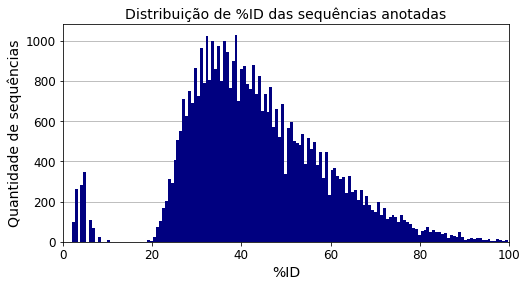

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylabel("Quantidade de sequências", fontdict={"fontsize":14})
ax.set_xlabel("%ID", fontdict={"fontsize":14})
plt.title("Distribuição de %ID das sequências anotadas", fontdict={"fontsize":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xlim(0,100)

ax.hist(trinotate_edit6[3], bins=150, color="navy")

plt.savefig("/content/drive/MyDrive/distribuicaoID.png", bbox_inches='tight')